# Aadhaar Enrolment & Update Indicators Analysis

## Problem Statement
The UIDAI Aadhaar ecosystem generates massive volumes of enrolment and update data across states and districts of India. However, this data is published in fragmented, multi-file tabular formats which makes it difficult to directly interpret national trends, regional workload distribution, and infrastructure pressure.

Policymakers and administrators need to understand where enrolments are still growing, where update activity dominates, and which regions experience abnormal operational load. The objective of this project is to transform raw UIDAI datasets into a structured analytical system that computes meaningful indicators such as system load and migration pressure, identifies high-risk districts, and visualizes national and regional Aadhaar activity patterns for data-driven decision making.

## Dataset Description
This project uses official UIDAI Aadhaar aggregated datasets provided for:

Enrolment data (new Aadhaar generations across age groups)

Demographic update data (name, address, DOB, etc.)

Biometric update data (fingerprint, iris, photo updates)

Each dataset contains records at date–state–district level with columns such as:

date – reporting date

state – state or UT name

district – district name

Age-wise or category-wise counts of enrolments and updates

These datasets are stored as multiple CSV files and are merged into a unified master dataset for analysis.

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import os

## Data Loading and Integration

In this step, all UIDAI CSV files from enrolment, demographic update, and biometric update folders are loaded and combined into unified datasets for further processing.

In [4]:
os.listdir("../data/biometric")


['api_data_aadhar_biometric_0_500000.csv',
 'api_data_aadhar_biometric_1000000_1500000.csv',
 'api_data_aadhar_biometric_1500000_1861108.csv',
 'api_data_aadhar_biometric_500000_1000000.csv']

In [5]:
os.listdir("../data/demographic")

['api_data_aadhar_demographic_0_500000.csv',
 'api_data_aadhar_demographic_1000000_1500000.csv',
 'api_data_aadhar_demographic_1500000_2000000.csv',
 'api_data_aadhar_demographic_2000000_2071700.csv',
 'api_data_aadhar_demographic_500000_1000000.csv']

In [6]:
os.listdir("../data/enrolment")

['api_data_aadhar_enrolment_0_500000.csv',
 'api_data_aadhar_enrolment_1000000_1006029.csv',
 'api_data_aadhar_enrolment_500000_1000000.csv']

## Data Cleaning and Preprocessing

This step standardizes date formats, merges multiple files, computes total enrolment and total update columns, and prepares aggregated district-level and state-level datasets for analysis.

In [7]:
import pandas as pd
import os

# Folder path
bio_folder = "../data/biometric"

# List all CSV files in biometric folder
bio_files = os.listdir(bio_folder)
print(bio_files)

# Read and combine all CSVs
bio_dfs = []

for file in bio_files:
    path = os.path.join(bio_folder, file)
    print("Loading:", path)
    df = pd.read_csv(path)
    bio_dfs.append(df)

biometric = pd.concat(bio_dfs, ignore_index=True)

print("Biometric dataset shape:", biometric.shape)
print(biometric.head())
print(biometric.columns)


['api_data_aadhar_biometric_0_500000.csv', 'api_data_aadhar_biometric_1000000_1500000.csv', 'api_data_aadhar_biometric_1500000_1861108.csv', 'api_data_aadhar_biometric_500000_1000000.csv']
Loading: ../data/biometric\api_data_aadhar_biometric_0_500000.csv
Loading: ../data/biometric\api_data_aadhar_biometric_1000000_1500000.csv
Loading: ../data/biometric\api_data_aadhar_biometric_1500000_1861108.csv
Loading: ../data/biometric\api_data_aadhar_biometric_500000_1000000.csv
Biometric dataset shape: (1861108, 6)
         date              state      district  pincode  bio_age_5_17  \
0  01-03-2025            Haryana  Mahendragarh   123029           280   
1  01-03-2025              Bihar     Madhepura   852121           144   
2  01-03-2025  Jammu and Kashmir         Punch   185101           643   
3  01-03-2025              Bihar       Bhojpur   802158           256   
4  01-03-2025         Tamil Nadu       Madurai   625514           271   

   bio_age_17_  
0          577  
1          369  

In [8]:
demo_folder = "../data/demographic"
demo_files = os.listdir(demo_folder)

demo_dfs = []
for file in demo_files:
    path = os.path.join(demo_folder, file)
    print("Loading:", path)
    df = pd.read_csv(path)
    demo_dfs.append(df)

demographic = pd.concat(demo_dfs, ignore_index=True)

print("Demographic dataset shape:", demographic.shape)
print(demographic.head())
print(demographic.columns)


Loading: ../data/demographic\api_data_aadhar_demographic_0_500000.csv
Loading: ../data/demographic\api_data_aadhar_demographic_1000000_1500000.csv
Loading: ../data/demographic\api_data_aadhar_demographic_1500000_2000000.csv
Loading: ../data/demographic\api_data_aadhar_demographic_2000000_2071700.csv
Loading: ../data/demographic\api_data_aadhar_demographic_500000_1000000.csv
Demographic dataset shape: (2071700, 6)
         date           state    district  pincode  demo_age_5_17  \
0  01-03-2025   Uttar Pradesh   Gorakhpur   273213             49   
1  01-03-2025  Andhra Pradesh    Chittoor   517132             22   
2  01-03-2025         Gujarat      Rajkot   360006             65   
3  01-03-2025  Andhra Pradesh  Srikakulam   532484             24   
4  01-03-2025       Rajasthan     Udaipur   313801             45   

   demo_age_17_  
0           529  
1           375  
2           765  
3           314  
4           785  
Index(['date', 'state', 'district', 'pincode', 'demo_age_5_1

In [9]:
enrol_folder = "../data/enrolment"
enrol_files = os.listdir(enrol_folder)

enrol_dfs = []
for file in enrol_files:
    path = os.path.join(enrol_folder, file)
    print("Loading:", path)
    df = pd.read_csv(path)
    enrol_dfs.append(df)

enrolment = pd.concat(enrol_dfs, ignore_index=True)

print("Enrolment dataset shape:", enrolment.shape)
print(enrolment.head())
print(enrolment.columns)


Loading: ../data/enrolment\api_data_aadhar_enrolment_0_500000.csv
Loading: ../data/enrolment\api_data_aadhar_enrolment_1000000_1006029.csv
Loading: ../data/enrolment\api_data_aadhar_enrolment_500000_1000000.csv
Enrolment dataset shape: (1006029, 7)
         date          state          district  pincode  age_0_5  age_5_17  \
0  02-03-2025      Meghalaya  East Khasi Hills   793121       11        61   
1  09-03-2025      Karnataka   Bengaluru Urban   560043       14        33   
2  09-03-2025  Uttar Pradesh      Kanpur Nagar   208001       29        82   
3  09-03-2025  Uttar Pradesh           Aligarh   202133       62        29   
4  09-03-2025      Karnataka   Bengaluru Urban   560016       14        16   

   age_18_greater  
0              37  
1              39  
2              12  
3              15  
4              21  
Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')


In [10]:
biometric["date"] = pd.to_datetime(biometric["date"], dayfirst=True)
print(biometric["date"].dtype)


datetime64[ns]


In [11]:
demographic["date"] = pd.to_datetime(demographic["date"], dayfirst=True)
print(demographic["date"].dtype)


datetime64[ns]


In [12]:
enrolment["date"] = pd.to_datetime(enrolment["date"], dayfirst=True)
print(enrolment["date"].dtype)

datetime64[ns]


In [13]:
biometric["total_bio_updates"] = biometric["bio_age_5_17"] + biometric["bio_age_17_"]
biometric[["bio_age_5_17", "bio_age_17_", "total_bio_updates"]].head()

,bio_age_5_17,bio_age_17_,total_bio_updates
0,280,577,857
1,144,369,513
2,643,1091,1734
3,256,980,1236
4,271,815,1086


In [14]:
enrolment["total_enrolment"] = (
    enrolment["age_0_5"] +
    enrolment["age_5_17"] +
    enrolment["age_18_greater"]
)


In [15]:
demographic["total_demo_updates"] = demographic["demo_age_5_17"] + demographic["demo_age_17_"]


In [16]:
biometric_agg = biometric.groupby(
    ["date", "state", "district"], as_index=False
)["total_bio_updates"].sum()

print(biometric_agg.shape)
print(biometric_agg.head())


(79794, 4)
        date                        state                  district  \
0 2025-03-01    Andaman & Nicobar Islands                  Andamans   
1 2025-03-01  Andaman and Nicobar Islands                   Nicobar   
2 2025-03-01  Andaman and Nicobar Islands  North And Middle Andaman   
3 2025-03-01  Andaman and Nicobar Islands             South Andaman   
4 2025-03-01               Andhra Pradesh                  Adilabad   

   total_bio_updates  
0                209  
1                279  
2                817  
3               1398  
4               5263  


In [17]:
biometric_agg.sort_values("total_bio_updates", ascending=False).head(10)


,date,state,district,total_bio_updates
3978,2025-07-01,Maharashtra,Nashik,83938
3982,2025-07-01,Maharashtra,Pune,83000
3990,2025-07-01,Maharashtra,Thane,74661
3107,2025-06-01,Maharashtra,Pune,69249
899,2025-04-01,Andhra Pradesh,Kurnool,67938
479,2025-03-01,Maharashtra,Pune,66091
3699,2025-07-01,Gujarat,Ahmedabad,65705
1064,2025-04-01,Delhi,North West Delhi,65071
1946,2025-05-01,Gujarat,Ahmedabad,64796
1353,2025-04-01,Maharashtra,Pune,63875


In [18]:
print(biometric_agg.shape)

(79794, 4)


In [19]:
demographic_agg = demographic.groupby(
    ["date", "state", "district"], as_index=False
)["total_demo_updates"].sum()

print(demographic_agg.shape)
print(demographic_agg.head())


(86125, 4)
        date                        state                  district  \
0 2025-03-01  Andaman and Nicobar Islands                   Nicobar   
1 2025-03-01  Andaman and Nicobar Islands  North And Middle Andaman   
2 2025-03-01  Andaman and Nicobar Islands             South Andaman   
3 2025-03-01               Andhra Pradesh                  Adilabad   
4 2025-03-01               Andhra Pradesh     Alluri Sitharama Raju   

   total_demo_updates  
0                 392  
1                 422  
2                 524  
3                4340  
4                4955  


In [20]:
enrolment_agg = enrolment.groupby(
    ["date", "state", "district"], as_index=False
)["total_enrolment"].sum()

print(enrolment_agg.shape)
print(enrolment_agg.head())


(66749, 4)
        date      state          district  total_enrolment
0 2025-03-02  Meghalaya  East Khasi Hills              109
1 2025-03-09      Bihar         Bhagalpur               71
2 2025-03-09      Bihar         Madhubani              160
3 2025-03-09      Bihar   Purbi Champaran              190
4 2025-03-09      Bihar         Sitamarhi              584


In [21]:
enrolment["date"] = pd.to_datetime(enrolment["date"], dayfirst=True)


In [22]:
enrolment["total_enrolment"] = (
    enrolment["age_0_5"] +
    enrolment["age_5_17"] +
    enrolment["age_18_greater"]
)


In [23]:
enrolment_agg = enrolment.groupby(
    ["date", "state", "district"], as_index=False
)["total_enrolment"].sum()

print(enrolment_agg.shape)
print(enrolment_agg.head())


(66749, 4)
        date      state          district  total_enrolment
0 2025-03-02  Meghalaya  East Khasi Hills              109
1 2025-03-09      Bihar         Bhagalpur               71
2 2025-03-09      Bihar         Madhubani              160
3 2025-03-09      Bihar   Purbi Champaran              190
4 2025-03-09      Bihar         Sitamarhi              584


In [24]:
print(demographic.columns)

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_',
       'total_demo_updates'],
      dtype='object')


In [25]:
demographic["date"] = pd.to_datetime(demographic["date"], dayfirst=True)


In [26]:
demographic["total_demo_updates"] = (
    demographic["demo_age_5_17"] +
    demographic["demo_age_17_"]
)


In [27]:
demographic_agg = demographic.groupby(
    ["date", "state", "district"], as_index=False
)["total_demo_updates"].sum()

print(demographic_agg.shape)
print(demographic_agg.head())


(86125, 4)
        date                        state                  district  \
0 2025-03-01  Andaman and Nicobar Islands                   Nicobar   
1 2025-03-01  Andaman and Nicobar Islands  North And Middle Andaman   
2 2025-03-01  Andaman and Nicobar Islands             South Andaman   
3 2025-03-01               Andhra Pradesh                  Adilabad   
4 2025-03-01               Andhra Pradesh     Alluri Sitharama Raju   

   total_demo_updates  
0                 392  
1                 422  
2                 524  
3                4340  
4                4955  


In [28]:
master = enrolment_agg.merge(
    demographic_agg,
    on=["date", "state", "district"],
    how="inner"
).merge(
    biometric_agg,
    on=["date", "state", "district"],
    how="inner"
)

print(master.shape)
print(master.head())


(52676, 6)
        date         state    district  total_enrolment  total_demo_updates  \
0 2025-04-01         Assam  Bongaigaon              369                4355   
1 2025-04-01         Bihar   Bhagalpur             1238                5302   
2 2025-04-01    Chandigarh  Chandigarh              117               14885   
3 2025-04-01  Chhattisgarh        Durg              384                6115   
4 2025-04-01  Chhattisgarh      Raipur              322               10348   

   total_bio_updates  
0               5647  
1              24587  
2               7921  
3              19191  
4              19183  


## Indicator Construction: Migration Pressure Index and System Load

To quantify operational stress on Aadhaar infrastructure, we define:

- **System Load** = Total Demographic Updates + Total Biometric Updates  
- **Migration Pressure Index (MPI)** = (Total Updates) / (Total Enrolment + 1)

This indicator highlights districts where update activity is disproportionately high compared to new enrolments, which may indicate population mobility, data correction surges, or administrative pressure.

In [29]:
master["migration_pressure_index"] = (
    (master["total_demo_updates"] + master["total_bio_updates"]) /
    (master["total_enrolment"] + 1)   # +1 avoids division by zero
)


In [30]:
print(master.columns)


Index(['date', 'state', 'district', 'total_enrolment', 'total_demo_updates',
       'total_bio_updates', 'migration_pressure_index'],
      dtype='object')


In [31]:
master.sort_values("migration_pressure_index", ascending=False).head(5)


,date,state,district,total_enrolment,total_demo_updates,total_bio_updates,migration_pressure_index
33438,2025-11-04,Maharashtra,Nashik,1,6397,4685,5541.000000
33428,2025-11-04,Maharashtra,Ahmadnagar,1,8133,2482,5307.500000
33436,2025-11-04,Maharashtra,Nanded,2,8636,1882,3506.000000
33444,2025-11-04,Maharashtra,Solapur,2,6942,1664,2868.666667
33440,2025-11-04,Maharashtra,Parbhani,1,3722,1594,2658.000000


In [32]:
master["system_load"] = master["total_demo_updates"] + master["total_bio_updates"]

In [33]:
print(master.sort_values("migration_pressure_index", ascending=False).head(5))

            date        state    district  total_enrolment  \
33438 2025-11-04  Maharashtra      Nashik                1   
33428 2025-11-04  Maharashtra  Ahmadnagar                1   
33436 2025-11-04  Maharashtra      Nanded                2   
33444 2025-11-04  Maharashtra     Solapur                2   
33440 2025-11-04  Maharashtra    Parbhani                1   

       total_demo_updates  total_bio_updates  migration_pressure_index  \
33438                6397               4685               5541.000000   
33428                8133               2482               5307.500000   
33436                8636               1882               3506.000000   
33444                6942               1664               2868.666667   
33440                3722               1594               2658.000000   

       system_load  
33438        11082  
33428        10615  
33436        10518  
33444         8606  
33440         5316  


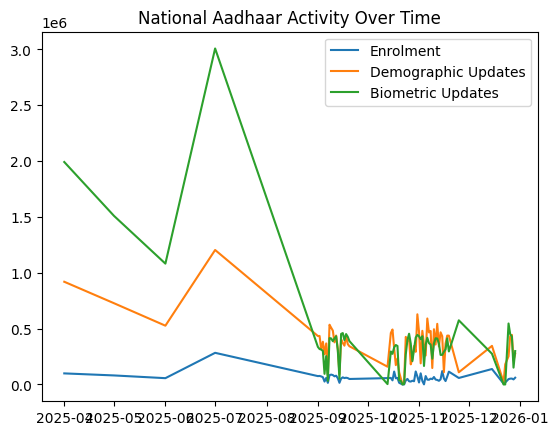

In [34]:
import matplotlib.pyplot as plt

national = master.groupby("date", as_index=False)[
    ["total_enrolment", "total_demo_updates", "total_bio_updates"]
].sum()

plt.figure()
plt.plot(national["date"], national["total_enrolment"], label="Enrolment")
plt.plot(national["date"], national["total_demo_updates"], label="Demographic Updates")
plt.plot(national["date"], national["total_bio_updates"], label="Biometric Updates")
plt.legend()
plt.title("National Aadhaar Activity Over Time")
plt.show()

### Insight

This visualization shows the overall national trend of Aadhaar enrolments and updates over time. It helps identify growth phases, saturation periods, and policy-driven activity spikes.

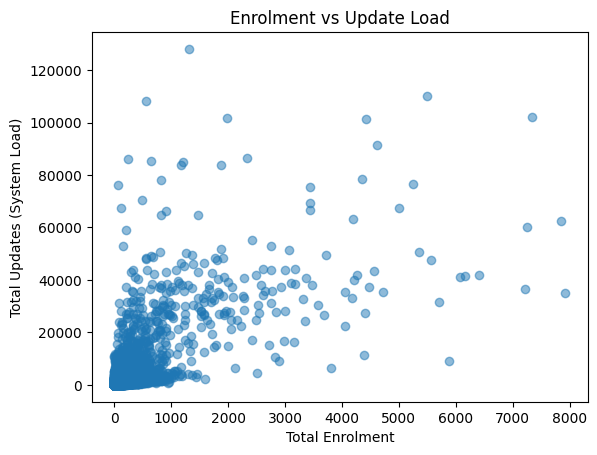

In [35]:
plt.figure()
plt.scatter(master["total_enrolment"], master["system_load"], alpha=0.5)
plt.xlabel("Total Enrolment")
plt.ylabel("Total Updates (System Load)")
plt.title("Enrolment vs Update Load")
plt.show()

### Insight

This scatter plot reveals the relationship between new enrolments and update workload. Regions far above the diagonal indicate update-heavy districts with high operational pressure.

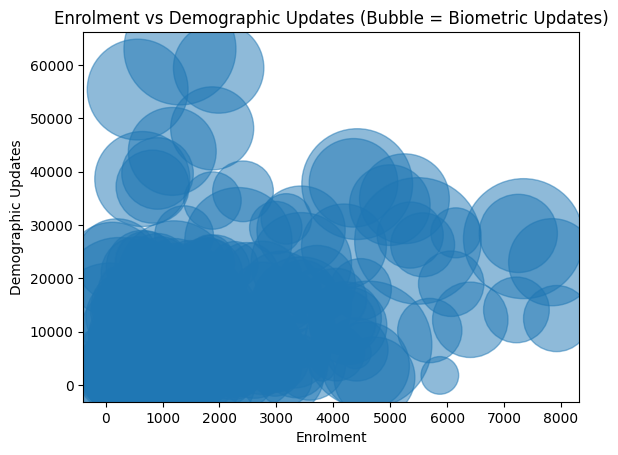

In [36]:
plt.figure()
plt.scatter(
    master["total_enrolment"],
    master["total_demo_updates"],
    s=master["total_bio_updates"] / 10,  # size scaled
    alpha=0.5
)
plt.xlabel("Enrolment")
plt.ylabel("Demographic Updates")
plt.title("Enrolment vs Demographic Updates (Bubble = Biometric Updates)")
plt.show()

### Insight

This bubble chart shows the relationship between new Aadhaar enrolments and demographic update activity, while the bubble size represents the volume of biometric updates. Most districts cluster in a region with moderate enrolment but significant update activity, indicating that Aadhaar operations in many areas are now driven more by maintenance and correction of existing records than by new registrations.

Large bubbles appearing even at relatively low enrolment values highlight districts where biometric update load is disproportionately high, suggesting high operational pressure possibly due to migration, data corrections, or re-verification drives. Overall, the visualization indicates a structural shift of the Aadhaar ecosystem from expansion-focused to update-heavy, maintenance-driven operations.

In [37]:
top_mpi = master.sort_values("migration_pressure_index", ascending=False).head(10)
top_mpi[["state", "district", "migration_pressure_index"]]

,state,district,migration_pressure_index
33438,Maharashtra,Nashik,5541.000000
33428,Maharashtra,Ahmadnagar,5307.500000
33436,Maharashtra,Nanded,3506.000000
33444,Maharashtra,Solapur,2868.666667
33440,Maharashtra,Parbhani,2658.000000
33530,Tamil Nadu,Tiruvallur,2420.500000
33433,Maharashtra,Latur,2373.500000
33524,Tamil Nadu,Kancheepuram,2139.000000
33445,Maharashtra,Thane,1994.666667
33540,Telangana,Mahabubnagar,1972.500000


## Anomaly Detection: Extreme Migration Pressure Zones

To detect abnormal districts, we mark the top 1% of records by Migration Pressure Index as potential operational stress or anomaly zones.

In [38]:
threshold = master["migration_pressure_index"].quantile(0.99)

anomalies = master[master["migration_pressure_index"] > threshold]

print("Number of extreme anomaly records:", len(anomalies))
anomalies.head()

Number of extreme anomaly records: 527


,date,state,district,total_enrolment,total_demo_updates,total_bio_updates,migration_pressure_index,system_load
2,2025-04-01,Chandigarh,Chandigarh,117,14885,7921,193.271186,22806
5,2025-04-01,Delhi,Central Delhi,133,13519,10564,179.723881,24083
9,2025-04-01,Delhi,South Delhi,563,55359,52703,191.599291,108062
12,2025-04-01,Gujarat,Ahmedabad,122,21671,45881,549.203252,67552
53,2025-04-01,Maharashtra,Pune,69,12436,63875,1090.157143,76311


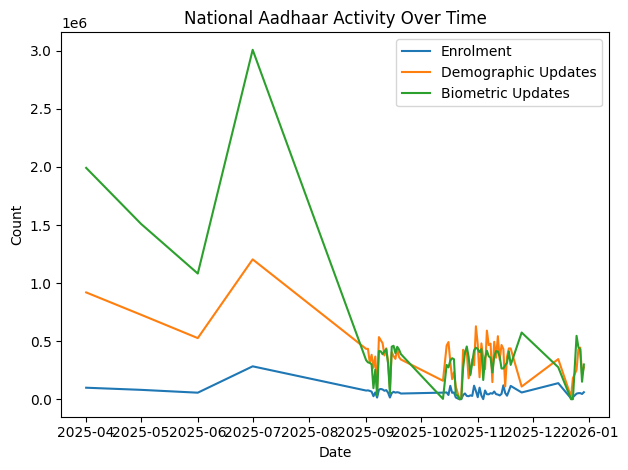

In [39]:
import matplotlib.pyplot as plt

# National aggregation
national = master.groupby("date", as_index=False)[
    ["total_enrolment", "total_demo_updates", "total_bio_updates"]
].sum()

plt.figure()
plt.plot(national["date"], national["total_enrolment"], label="Enrolment")
plt.plot(national["date"], national["total_demo_updates"], label="Demographic Updates")
plt.plot(national["date"], national["total_bio_updates"], label="Biometric Updates")
plt.legend()
plt.title("National Aadhaar Activity Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()

plt.savefig("../outputs/national_trend.png", dpi=150)
plt.show()


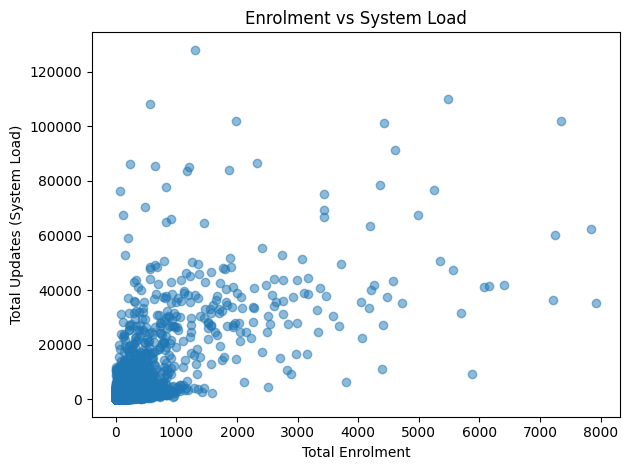

In [40]:
plt.figure()
plt.scatter(master["total_enrolment"], master["system_load"], alpha=0.5)
plt.xlabel("Total Enrolment")
plt.ylabel("Total Updates (System Load)")
plt.title("Enrolment vs System Load")
plt.tight_layout()

plt.savefig("../outputs/enrolment_vs_system_load.png", dpi=150)
plt.show()


In [41]:
top10_mpi = master.sort_values("migration_pressure_index", ascending=False).head(10)

top10_mpi_table = top10_mpi[[
    "date", "state", "district",
    "total_enrolment", "total_demo_updates", "total_bio_updates",
    "migration_pressure_index"
]]

top10_mpi_table.to_csv("../outputs/top10_migration_pressure.csv", index=False)
top10_mpi_table


,date,state,district,total_enrolment,total_demo_updates,total_bio_updates,migration_pressure_index
33438,2025-11-04,Maharashtra,Nashik,1,6397,4685,5541.000000
33428,2025-11-04,Maharashtra,Ahmadnagar,1,8133,2482,5307.500000
33436,2025-11-04,Maharashtra,Nanded,2,8636,1882,3506.000000
33444,2025-11-04,Maharashtra,Solapur,2,6942,1664,2868.666667
33440,2025-11-04,Maharashtra,Parbhani,1,3722,1594,2658.000000
33530,2025-11-04,Tamil Nadu,Tiruvallur,1,1797,3044,2420.500000
33433,2025-11-04,Maharashtra,Latur,1,3577,1170,2373.500000
33524,2025-11-04,Tamil Nadu,Kancheepuram,1,2078,2200,2139.000000
33445,2025-11-04,Maharashtra,Thane,5,7508,4460,1994.666667
33540,2025-11-04,Telangana,Mahabubnagar,1,1467,2478,1972.500000


In [42]:
threshold = master["migration_pressure_index"].quantile(0.99)
anomalies = master[master["migration_pressure_index"] > threshold]

anomalies.to_csv("../outputs/anomalies_top1percent.csv", index=False)

print("Anomaly records:", len(anomalies))
anomalies.head()


Anomaly records: 527


,date,state,district,total_enrolment,total_demo_updates,total_bio_updates,migration_pressure_index,system_load
2,2025-04-01,Chandigarh,Chandigarh,117,14885,7921,193.271186,22806
5,2025-04-01,Delhi,Central Delhi,133,13519,10564,179.723881,24083
9,2025-04-01,Delhi,South Delhi,563,55359,52703,191.599291,108062
12,2025-04-01,Gujarat,Ahmedabad,122,21671,45881,549.203252,67552
53,2025-04-01,Maharashtra,Pune,69,12436,63875,1090.157143,76311


In [43]:
master.to_csv("../outputs/final_master_dataset.csv", index=False)


In [44]:
state_summary = master.groupby("state", as_index=False)[
    ["total_enrolment", "total_demo_updates", "total_bio_updates", "system_load"]
].sum()

state_summary.head()

,state,total_enrolment,total_demo_updates,total_bio_updates,system_load
0,Andaman & Nicobar Islands,83,304,545,849
1,Andaman and Nicobar Islands,309,2181,4178,6359
2,Andhra Pradesh,108149,900164,1083937,1984101
3,Arunachal Pradesh,3034,17901,18805,36706
4,Assam,145300,563067,445976,1009043


In [45]:
# Sort for better visualization
state_summary_sorted = state_summary.sort_values("system_load", ascending=False)

# Set state as index
heatmap_data = state_summary_sorted.set_index("state")[["system_load"]]

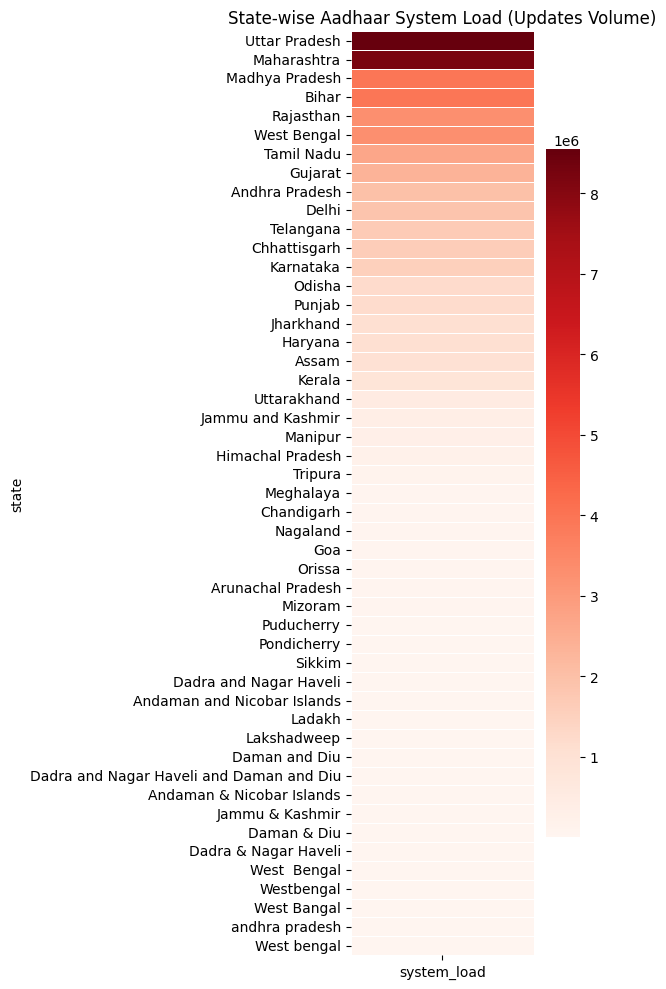

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 10))
sns.heatmap(
    heatmap_data,
    cmap="Reds",
    linewidths=0.5
)

plt.title("State-wise Aadhaar System Load (Updates Volume)")
plt.tight_layout()

plt.savefig("../outputs/statewise_systemload_heatmap.png", dpi=150)
plt.show()

### Insight

The heatmap highlights states with the highest cumulative Aadhaar system load, allowing quick identification of infrastructure stress zones.

In [47]:
top10_states = state_summary_sorted.head(10)
top10_states

,state,total_enrolment,total_demo_updates,total_bio_updates,system_load
41,Uttar Pradesh,729301,4463311,4084396,8547707
26,Maharashtra,296316,3285271,4938587,8223858
25,Madhya Pradesh,406462,1323480,2645753,3969233
5,Bihar,378630,2708675,1259897,3968572
36,Rajasthan,292991,1094094,2210633,3304727
45,West Bengal,296355,2360333,941358,3301691
38,Tamil Nadu,185021,1135122,1556367,2691489
15,Gujarat,176583,959156,1378534,2337690
2,Andhra Pradesh,108149,900164,1083937,1984101
13,Delhi,83139,945271,935218,1880489


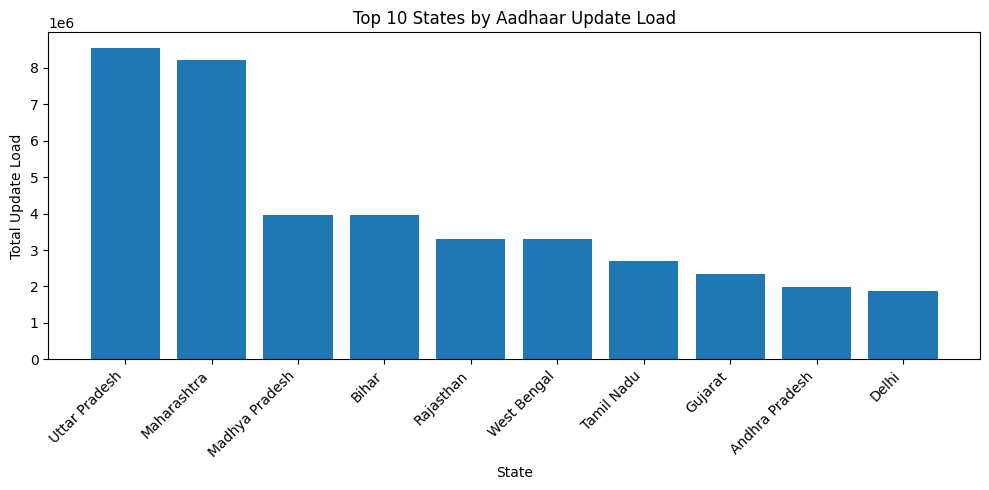

In [48]:
plt.figure(figsize=(10, 5))
plt.bar(top10_states["state"], top10_states["system_load"])

plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Total Update Load")
plt.title("Top 10 States by Aadhaar Update Load")

plt.tight_layout()
plt.savefig("../outputs/top10_states_systemload.png", dpi=150)
plt.show()

### Insight

This chart ranks the top 10 states by total update volume, helping prioritize resource allocation and administrative focus.

In [49]:
state_kpi = master.groupby("state", as_index=False).agg(
    total_enrolment=("total_enrolment", "sum"),
    total_updates=("system_load", "sum"),
    avg_mpi=("migration_pressure_index", "mean"),
    max_mpi=("migration_pressure_index", "max")
)

# Sort by total updates (system load)
state_kpi = state_kpi.sort_values("total_updates", ascending=False)

state_kpi.head(10)
state_kpi.to_csv("../outputs/state_kpi_summary.csv", index=False)

In [50]:
district_risk = master.sort_values(
    "migration_pressure_index", ascending=False
)[[
    "date", "state", "district",
    "total_enrolment", "total_demo_updates", "total_bio_updates",
    "migration_pressure_index", "system_load"
]]

district_risk.head(50)


,date,state,district,total_enrolment,total_demo_updates,total_bio_updates,migration_pressure_index,system_load
33438,2025-11-04,Maharashtra,Nashik,1,6397,4685,5541.000000,11082
33428,2025-11-04,Maharashtra,Ahmadnagar,1,8133,2482,5307.500000,10615
33436,2025-11-04,Maharashtra,Nanded,2,8636,1882,3506.000000,10518
33444,2025-11-04,Maharashtra,Solapur,2,6942,1664,2868.666667,8606
33440,2025-11-04,Maharashtra,Parbhani,1,3722,1594,2658.000000,5316
33530,2025-11-04,Tamil Nadu,Tiruvallur,1,1797,3044,2420.500000,4841
33433,2025-11-04,Maharashtra,Latur,1,3577,1170,2373.500000,4747
33524,2025-11-04,Tamil Nadu,Kancheepuram,1,2078,2200,2139.000000,4278
33445,2025-11-04,Maharashtra,Thane,5,7508,4460,1994.666667,11968
33540,2025-11-04,Telangana,Mahabubnagar,1,1467,2478,1972.500000,3945


In [51]:
district_risk.head(50).to_csv("../outputs/top50_district_risk.csv", index=False)


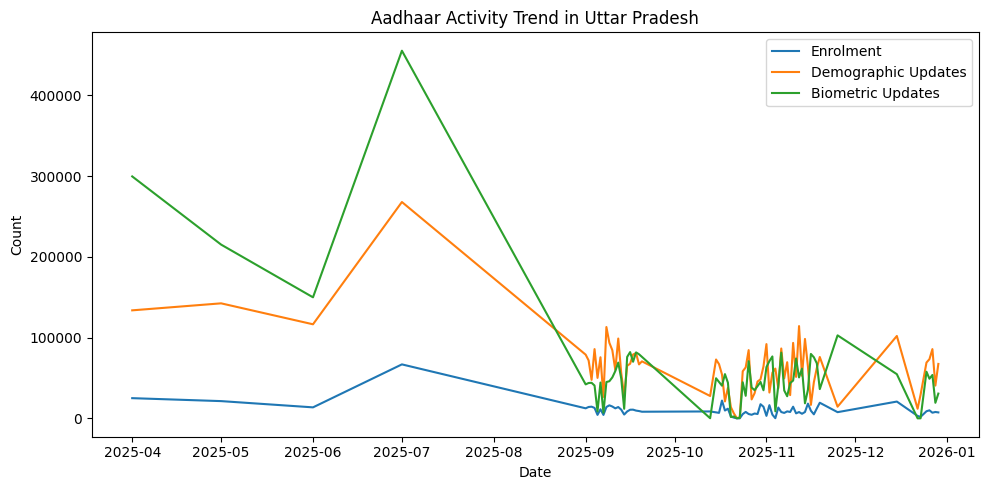

In [52]:
state_name = "Uttar Pradesh"

state_ts = master[master["state"] == state_name].groupby(
    "date", as_index=False
)[["total_enrolment", "total_demo_updates", "total_bio_updates"]].sum()

plt.figure(figsize=(10, 5))
plt.plot(state_ts["date"], state_ts["total_enrolment"], label="Enrolment")
plt.plot(state_ts["date"], state_ts["total_demo_updates"], label="Demographic Updates")
plt.plot(state_ts["date"], state_ts["total_bio_updates"], label="Biometric Updates")

plt.legend()
plt.title(f"Aadhaar Activity Trend in {state_name}")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()

plt.savefig(f"../outputs/{state_name.replace(' ', '_')}_trend.png", dpi=150)
plt.show()

## Conclusion

This analysis transforms raw UIDAI Aadhaar datasets into a structured indicator-based monitoring system. The Migration Pressure Index and System Load metrics successfully identify high-risk districts and high-load states. The visualizations reveal national trends, regional workload concentration, and abnormal activity zones. This framework can help policymakers optimize infrastructure deployment, staffing, and operational planning for Aadhaar services.